In [1]:
setwd('/import/liujing/data2/')

In [2]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)

overlap = read.table('./overlap.txt',header =T)

data = data[!duplicated(data$Gene_name),]
head(data,2)
expr = data %>%  tibble::remove_rownames() %>% filter(Gene_name %in% overlap$GeneName) %>%  
tibble::column_to_rownames(.,'Gene_name') %>% t() %>% as.data.frame()
Group = c(rep('con',31),rep('CI',43))



colnames(expr) = gsub('-','.',colnames(expr))

colnames(expr)

head(expr,2)

Type = ifelse(Group == 'CI',1,0)

nn = cbind(Type,expr)



#save(nn,file = 'data.new.rda')

Warning message:
"package 'openxlsx' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,Gene_name,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
2,ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


[1] "ZNF480"   "ZNF354A"  "ZNF208"   "ZBED5"    "XRCC4"    "VCL"     
 [7] "TXN"      "TLN1"     "TFEC"     "TAF7"     "SYCP2"    "SUMO4"   
[13] "STON2"    "SPON2"    "SPOCD1"   "SH3TC2"   "SH2D2A"   "SCN9A"   
[19] "SAMD9"    "RPL34"    "RASD2"    "PTPRS"    "PRF1"     "POLR2K"  
[25] "PITPNM2"  "PILRB"    "PER1"     "PDGFA"    "PCDH1"    "OSBPL7"  
[31] "OSBPL5"   "NID1"     "NCR3"     "MLC1"     "MAP1A"    "LSM3"    
[37] "LPAR6"    "LMNA"     "KIR2DL1"  "KIFC3"    "IL2RB"    "IGJ"     
[43] "HCFC1"    "GPR56"    "GNLY"     "GAPT"     "FSD1"     "FOSB"    
[49] "FLNA"     "FAM200B"  "F2R"      "EVI2A"    "ERBB2"    "DUSP2"   
[55] "DDIT4"    "DAB2"     "CSTA"     "CLSTN1"   "CLEC2B"   "CARNS1"  
[61] "CACNA2D2" "BZRAP1"   "BMP6"     "BCL2A1"   "BAI2"     "ATP1A3"  
[67] "ATG2A"    "ARVCF"    "ARHGAP6"

,ZNF480,ZNF354A,ZNF208,ZBED5,XRCC4,VCL,TXN,TLN1,TFEC,TAF7,...,CARNS1,CACNA2D2,BZRAP1,BMP6,BCL2A1,BAI2,ATP1A3,ATG2A,ARVCF,ARHGAP6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C10,5.156136,5.125855,0.5392760,10.32473,2.339176,46.57527,7.655688,101.2624,3.548980,14.05923,...,2.390462,2.652530,3.472469,5.936213,22.32717,0.2332996,0.8470702,13.04633,0.8559196,1.176161
C11,5.341337,6.072094,0.3636642,10.90038,2.871262,51.53112,17.794071,101.7559,5.233879,18.91710,...,2.103993,4.407767,5.835689,3.418444,32.12134,0.1628312,0.9373913,15.02437,0.8992942,1.233943


In [3]:
x = as.matrix(expr)
y = Type

In [4]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [5]:
options(repr.plot.width = 6)

In [6]:
set.seed(101)

In [7]:
dim(expr)

[1] 74 69

In [8]:
rf = randomForest(as.factor(y)~.,data = x,ntree =2000,important=TRUE,proximity=TRUE)

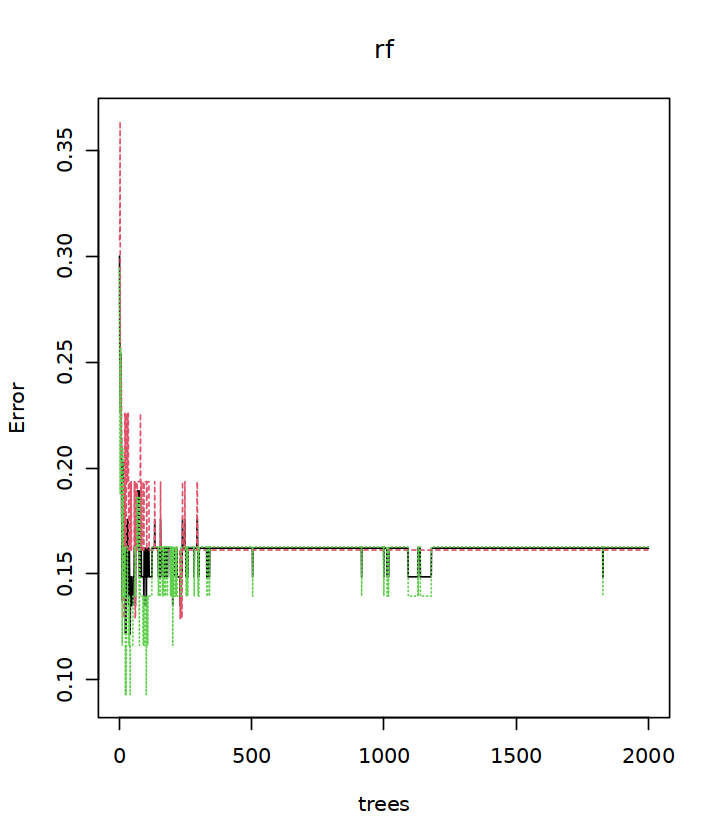

In [9]:
plot(rf)

In [10]:
pdf('figure2.forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [11]:
trees = which.min(rf$err.rate[,1])

In [12]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [13]:
importance = importance(rf)

In [14]:
rf


Call:
 randomForest(formula = as.factor(y) ~ ., data = x, ntree = trees,      important = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 23
No. of variables tried at each split: 8

        OOB estimate of  error rate: 24.32%
Confusion matrix:
   0  1 class.error
0 22  9   0.2903226
1  9 34   0.2093023

In [15]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [16]:
options(repr.plot.width = 4,repr.plot.height = 6)

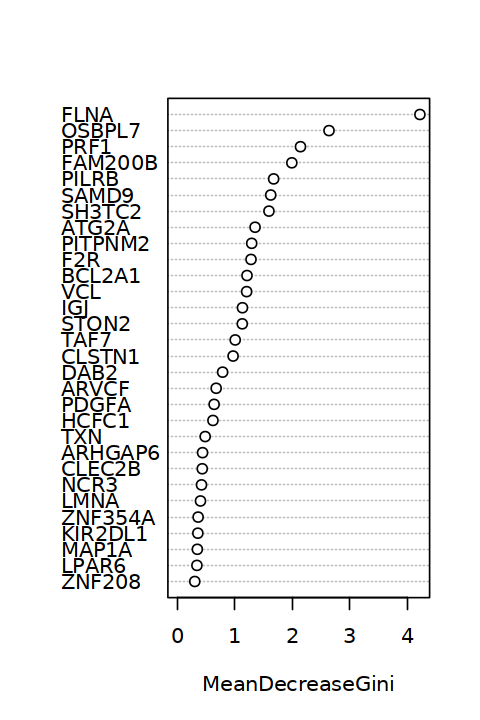

In [17]:
varImpPlot(rf,main = '')

In [18]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [19]:
names(rfGenes)

[1] "FLNA"     "OSBPL7"   "PRF1"     "FAM200B"  "PILRB"    "SAMD9"   
 [7] "SH3TC2"   "ATG2A"    "PITPNM2"  "F2R"      "BCL2A1"   "VCL"     
[13] "IGJ"      "STON2"    "TAF7"     "CLSTN1"   "DAB2"     "ARVCF"   
[19] "PDGFA"    "HCFC1"    "TXN"      "ARHGAP6"  "CLEC2B"   "NCR3"    
[25] "LMNA"     "ZNF354A"  "KIR2DL1"  "MAP1A"    "LPAR6"    "ZNF208"  
[31] "ZNF480"   "DUSP2"    "BZRAP1"   "PCDH1"    "SYCP2"    "GNLY"    
[37] "ATP1A3"   "CSTA"     "KIFC3"    "PTPRS"    "POLR2K"   "ERBB2"   
[43] "BMP6"     "TFEC"     "SCN9A"    "DDIT4"    "SUMO4"    "XRCC4"   
[49] "SPOCD1"   "CACNA2D2" "IL2RB"    "ZBED5"    "TLN1"     "SPON2"   
[55] "SH2D2A"   "RPL34"    "RASD2"    "PER1"     "OSBPL5"   "NID1"    
[61] "MLC1"     "LSM3"     "GPR56"    "GAPT"     "FSD1"     "FOSB"    
[67] "EVI2A"    "CARNS1"   "BAI2"

In [20]:
# rfGenes=names(rfGenes[rfGenes>30]) 
# write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

# sigExp=expr[rfGenes,]
# write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

### svm

In [21]:
# library(tidyverse)
# library(glmnet)
# library(VennDiagram)
# library(e1071)
# library(caret)
# library(randomForest)

# y=as.numeric(as.factor(Type))

# y



# library(future)
# plan("multisession",workers=30)

# set.seed(1)
# rfeControl = rfeControl(functions = caretFuncs,
#                         method = "cv", # 默认自助法重采样 boot
#                         saveDetails = T, # 保存预测值和变量重要性
#                         number = 5, # 重抽样次数
#                         allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
#                         )

# Profile=rfe(x=x,y=y,sizes = c(1:10),
#     rfeControl =  rfeControl,
#     methods="svmRadial")

# pdf(file="SVM-RFE.pdf", width=6, height=5.5)
# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
# dev.off()

# par(las=1)
# x= Profile$results$Variables 
# y =Profile$results$RMSE
# plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
# lines(x, y, col="darkgreen")
# wmin=which.min(y) 
# wmin.x=x[wmin] 
# wmin.y=y[wmin]
# points(wmin.x, wmin.y, col="blue", pch=16)
# text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

# #输出
# featureGenes = Profile$optVariables
# write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

# featureGenes

### Boruta

In [22]:
library(Boruta)

In [23]:
set.seed(1)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [24]:
boruta

Boruta performed 299 iterations in 18.6625 secs.
 30 attributes confirmed important: ARHGAP6, ARVCF, ATG2A, BZRAP1,
CLSTN1 and 25 more;
 33 attributes confirmed unimportant: ATP1A3, BAI2, BCL2A1, BMP6,
CACNA2D2 and 28 more;
 6 tentative attributes left: IGJ, MLC1, SH2D2A, ZNF208, ZNF354A and 1
more;

In [25]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        6        30        33 

In [26]:
boruta$finalDecision

ZNF480   ZNF354A    ZNF208     ZBED5     XRCC4       VCL       TXN      TLN1 
Tentative Tentative Tentative  Rejected  Rejected Confirmed Confirmed Confirmed 
     TFEC      TAF7     SYCP2     SUMO4     STON2     SPON2    SPOCD1    SH3TC2 
 Rejected  Rejected  Rejected Confirmed Confirmed  Rejected  Rejected Confirmed 
   SH2D2A     SCN9A     SAMD9     RPL34     RASD2     PTPRS      PRF1    POLR2K 
Tentative Confirmed Confirmed  Rejected  Rejected Confirmed Confirmed  Rejected 
  PITPNM2     PILRB      PER1     PDGFA     PCDH1    OSBPL7    OSBPL5      NID1 
Confirmed Confirmed Confirmed Confirmed  Rejected Confirmed  Rejected  Rejected 
     NCR3      MLC1     MAP1A      LSM3     LPAR6      LMNA   KIR2DL1     KIFC3 
 Rejected Tentative Confirmed  Rejected  Rejected  Rejected Confirmed Confirmed 
    IL2RB       IGJ     HCFC1     GPR56      GNLY      GAPT      FSD1      FOSB 
 Rejected Tentative Confirmed Confirmed  Rejected  Rejected  Rejected  Rejected 
     FLNA   FAM200B       F2R     EVI2A     ERBB2     DUSP2     DDIT4      DAB2 
Confirmed Confirmed Confirmed Confirmed  Rejected  Rejected  Rejected Confirmed 
     CSTA    CLSTN1    CLEC2B    CARNS1  CACNA2D2    BZRAP1      BMP6    BCL2A1 
 Rejected Confirmed  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected 
     BAI2    ATP1A3     ATG2A     ARVCF   ARHGAP6 
 Rejected  Rejected Confirmed Confirmed Confirmed 
Levels: Tentative Confirmed Rejected

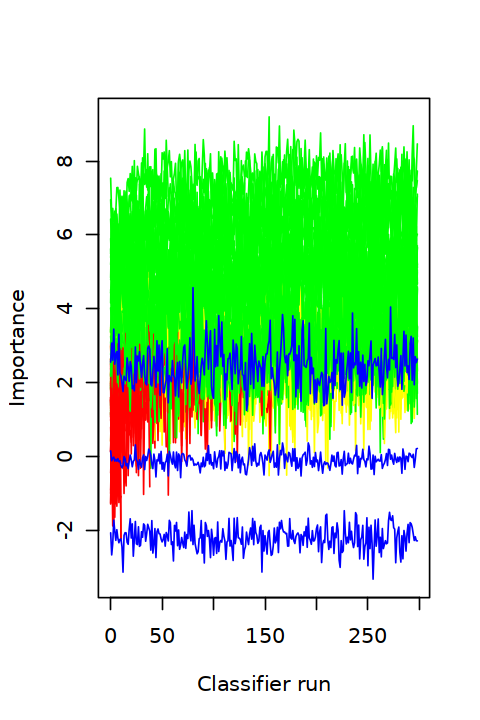

In [27]:
Boruta::plotImpHistory(boruta)

In [28]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




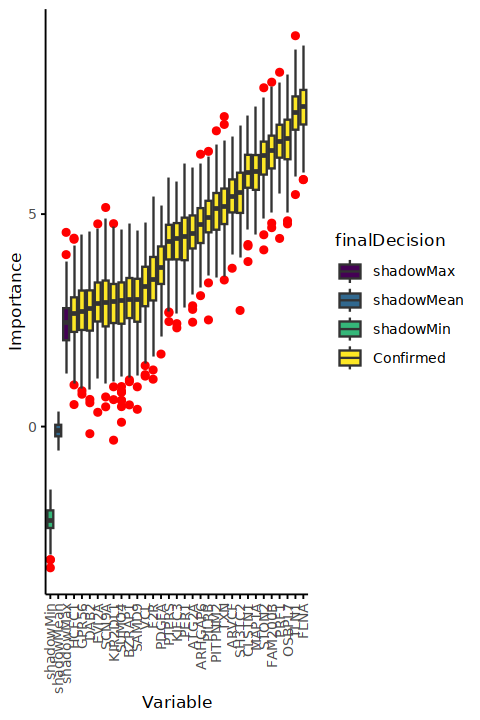

In [29]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

### lasso

In [30]:
# set.seed(1271)

# library(lars) 
# library(glmnet) 

# model_lasso <- glmnet(x, y, family="binomial", nlambda=100, alpha=1)#拉手回归模型
# plot(model_lasso, xvar = "norm", label = TRUE)
# plot(model_lasso, xvar="lambda", label=TRUE)
# cv_fit <- cv.glmnet(x=x, y=y, alpha = 1, nlambda = 100)

# plot(cv_fit)

# # 两条虚线分别指示了两个特殊的λ值:
# c(cv_fit$lambda.min,cv_fit$lambda.1se) 

# model_lasso <- glmnet(x=as.matrix(x), y=y, alpha = 1, lambda=cv_fit$lambda.1se	)
# gene_1se <- rownames(model_lasso$beta)[as.numeric(model_lasso$beta)!=0]
# #gene_1se = gsub('[.]',' ',gene_1se)

# gene_1se

# lasso.gene = gene_1se

In [31]:
expr3 = cbind(Group,expr)

In [32]:
# set.seed(157)  
# index <-  which( (1:nrow(expr3))%%3 == 0 )
# train <- expr3[-index,]
# test <- expr3[index,]

# table(test$Group)

# library("xgboost")
# library("Matrix")
# train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
# test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
# all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)

# train_label <- as.numeric(train$Group == 'CI')
# test_label <-  as.numeric(test$Group == 'CI')
# all_label <-  as.numeric(expr3$Group == 'CI')



# all_label

# train_fin <- list(data=train_matrix,label=train_label) 
# test_fin <- list(data=test_matrix,label=test_label) 
# all_fin <- list(data=all_matrix,label=all_label) 

# dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
# dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
# dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

# xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
#   objective='binary:logistic', nround=25)

# xgb

# importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
# head(importance)
# xgb.ggplot.importance(importance)

# xgb.plot.importance(importance)

### 韦恩图

In [33]:
# SVF.RFE.gene = featureGenes

# RF.gene = colnames(sigExp)

# XGBoost.gene = importance$Feature

# boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed')) %>% dplyr::select(Variable) %>% unique()



# Boruta.gene = as.vector(boruta.variable.imp2$Variable)

# list1 = list(Boruta.gene,XGBoost.gene) #SVF.RFE.gene, RF.gene,

# data =  as.data.frame (do.call (cbind, list1))


# library(venn)
#         library(VennDiagram)
#         color=c( "#3C5488B2","#00A087B2", 
#              "#F39B7FB2","#91D1C2B2", 
#              "#8491B4B2", "#DC0000B2", 
#              "#7E6148B2","yellow", 
#              "darkolivegreen1", "lightskyblue", 
#              "darkgreen", "deeppink", "khaki2", 
#              "firebrick", "brown1", "darkorange1", 
#              "cyan1", "royalblue4", "darksalmon", 
#              "darkgoldenrod1", "darkseagreen", "darkorchid")

#     if (ncol(data) == 2){
#         sample_list <- list(Boruta.gene = data[,1], XGBoost.gene = data[,2])
#     }else if(ncol(data) == 3){
#         sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
#     }else if(ncol(data) == 4){
#         sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
#     }else{
#         sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
#     }
    
#     q <- venn.diagram(sample_list,filename = NULL,
#              fill = color[1:(length(sample_list))],
#              alpha = 0.50, cat.col = rep('black', ncol(data)), 
#              col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
#                              )
#     pdf(paste0('./',"venn.pdf"))
#     grid.draw(q)
#     dev.off()

# grid.draw(q)

# model.gene = intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),SVF.RFE.gene)

In [34]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed')) %>% dplyr::select(Variable) %>% unique()
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [35]:
model.gene = Boruta.gene

In [36]:
model.gene

[1] "ARHGAP6" "ARVCF"   "ATG2A"   "BZRAP1"  "CLSTN1"  "DAB2"    "EVI2A"  
 [8] "F2R"     "FAM200B" "FLNA"    "GPR56"   "HCFC1"   "KIFC3"   "KIR2DL1"
[15] "MAP1A"   "OSBPL7"  "PDGFA"   "PER1"    "PILRB"   "PITPNM2" "PRF1"   
[22] "PTPRS"   "SAMD9"   "SCN9A"   "SH3TC2"  "STON2"   "SUMO4"   "TLN1"   
[29] "TXN"     "VCL"

In [37]:
a  = names(rfGenes)[1:25]

In [38]:
# model.gene = names(rfGenes)[1:20]

# model.gene = intersect(Boruta.gene,names(rfGenes)[1:30])

model.gene =a

In [39]:
model.gene

[1] "FLNA"    "OSBPL7"  "PRF1"    "FAM200B" "PILRB"   "SAMD9"   "SH3TC2" 
 [8] "ATG2A"   "PITPNM2" "F2R"     "BCL2A1"  "VCL"     "IGJ"     "STON2"  
[15] "TAF7"    "CLSTN1"  "DAB2"    "ARVCF"   "PDGFA"   "HCFC1"   "TXN"    
[22] "ARHGAP6" "CLEC2B"  "NCR3"    "LMNA"

In [40]:
set.seed(1234)

In [41]:
expr = as.data.frame(apply(expr,2,as.numeric))

In [42]:
expr3 = as.data.frame(cbind(Group,expr))

In [43]:
expr3$Group = ifelse(expr3$Group == 'CI',1,0)

In [44]:
expr3$Group = as.factor(expr3$Group)

In [45]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
i Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(model.gene)

  # Now:
  data %>% select(all_of(model.gene))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


In [46]:
dim(expr4)

[1] 74 26

In [47]:
head(expr4,4)

,Group,FLNA,OSBPL7,PRF1,FAM200B,PILRB,SAMD9,SH3TC2,ATG2A,PITPNM2,...,CLSTN1,DAB2,ARVCF,PDGFA,HCFC1,TXN,ARHGAP6,CLEC2B,NCR3,LMNA
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,173.9405,5.085089,126.5548,4.886505,1.712318,32.51025,0.2337882,13.04633,5.723598,...,16.82540,4.164622,0.8559196,1.632609,16.06443,7.655688,1.176161,15.45308,9.646492,2.421837
2,0,173.4102,4.899562,129.5850,6.201921,1.056324,50.12144,0.1746903,15.02437,4.599906,...,13.40344,4.082477,0.8992942,1.546559,11.72785,17.794071,1.233943,28.83879,8.216351,1.924999
3,0,178.6210,5.459095,142.2673,5.778473,1.858418,48.90929,0.2176311,17.88716,5.601272,...,16.65883,4.669645,1.1737319,1.392164,15.44092,13.325481,1.089114,24.91838,12.833994,2.323408
4,0,234.2787,3.826873,209.4598,5.170836,1.093949,36.25937,0.2769637,16.37020,5.435442,...,15.26384,3.392254,0.8793481,2.218069,12.73905,15.403335,1.223507,26.34199,11.395057,3.267599


In [48]:
library(caret)
library(ggplot2)

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


In [49]:
library(caret)
library(ggplot2)

table = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )

        table = append(table,res$auc)


    
    }

In [52]:
auc = data.frame(gene = model.gene,auc = table)

In [54]:
write.csv(auc,file = 'auc.csv')

### 这里使用48个基因先看看情况



In [55]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.7){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] "FAM200B 0.900975243810953"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SAMD9 0.797449362340585"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "BCL2A1 0.731432858214554"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "IGJ 0.718679669917479"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TAF7 0.800450112528132"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TXN 0.833458364591148"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CLEC2B 0.780945236309077"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


### 批量单因素逻辑回归

In [56]:
a

[1] "FAM200B" "SAMD9"   "BCL2A1"  "IGJ"     "TAF7"    "TXN"     "CLEC2B"

In [57]:
expr4 = expr4[,c('Group',a)]

In [58]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 4.2.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: foreign

Warning message:
"package 'foreign' was built under R version 4.2.3"
Loading requi

In [59]:
varsU<-names(expr4[,2:dim(expr4)[2]])

In [60]:
Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



In [61]:
Result

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
FAM200B,1.62868115,0.392785478,4.146490,3.376106e-05,5.097148,2.626555,12.577251,FAM200B
SAMD9,0.06235207,0.018098816,3.445091,5.708673e-04,1.064337,1.031340,1.107965,SAMD9
BCL2A1,0.04984612,0.016348041,3.049058,2.295604e-03,1.051109,1.021015,1.088910,BCL2A1
IGJ,0.02557740,0.009244842,2.766667,5.663249e-03,1.025907,1.009478,1.047112,IGJ
TAF7,0.21097212,0.055632134,3.792271,1.492760e-04,1.234878,1.120166,1.396531,TAF7
TXN,0.27518002,0.071620720,3.842184,1.219441e-04,1.316768,1.161755,1.541887,TXN
CLEC2B,0.14552677,0.040444621,3.598174,3.204597e-04,1.156649,1.077389,1.264078,CLEC2B


In [62]:
Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

In [63]:
tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

In [64]:
Uni_log[tzgene,]

,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
FAM200B,1.62868115,3.376106e-05,5.097148,2.626555,12.577251,FAM200B
SAMD9,0.06235207,5.708673e-04,1.064337,1.031340,1.107965,SAMD9
BCL2A1,0.04984612,2.295604e-03,1.051109,1.021015,1.088910,BCL2A1
IGJ,0.02557740,5.663249e-03,1.025907,1.009478,1.047112,IGJ
TAF7,0.21097212,1.492760e-04,1.234878,1.120166,1.396531,TAF7
TXN,0.27518002,1.219441e-04,1.316768,1.161755,1.541887,TXN
CLEC2B,0.14552677,3.204597e-04,1.156649,1.077389,1.264078,CLEC2B


### 多因素分析

In [64]:
#tzgene = tzgene[-c(1,5)]

In [65]:
tzgene

[1] "FAM200B" "SAMD9"   "BCL2A1"  "IGJ"     "TAF7"    "TXN"     "CLEC2B"

In [66]:
#tzgene1 = tzgene[-5]

In [67]:
data = expr4[,c('Group',tzgene)]
data$Group = factor(data$Group,levels = c(0,1))

In [68]:
fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.60570  -0.36452   0.00619   0.35243   2.70795  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -14.775523   3.800537  -3.888 0.000101 ***
FAM200B       1.772176   0.603982   2.934 0.003345 ** 
SAMD9         0.040415   0.043092   0.938 0.348311    
BCL2A1       -0.053702   0.037880  -1.418 0.156283    
IGJ           0.027406   0.014756   1.857 0.063269 .  
TAF7         -0.006388   0.119356  -0.054 0.957318    
TXN           0.350635   0.156328   2.243 0.024901 *  
CLEC2B       -0.080369   0.098376  -0.817 0.413956    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 100.63  on 73  degrees of freedom
Residual deviance:  44.65  on 66  degrees of freedom
AIC: 60.65

Number of Fisher Scoring iterations: 7


In [69]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=60.65
Group ~ FAM200B + SAMD9 + BCL2A1 + IGJ + TAF7 + TXN + CLEC2B

          Df Deviance    AIC
- TAF7     1   44.652 58.652
- CLEC2B   1   45.349 59.349
- SAMD9    1   45.545 59.545
<none>         44.650 60.650
- BCL2A1   1   46.770 60.770
- IGJ      1   48.841 62.841
- TXN      1   51.514 65.514
- FAM200B  1   58.703 72.703

Step:  AIC=58.65
Group ~ FAM200B + SAMD9 + BCL2A1 + IGJ + TXN + CLEC2B

          Df Deviance    AIC
- CLEC2B   1   45.385 57.385
- SAMD9    1   45.763 57.763
<none>         44.652 58.652
- BCL2A1   1   47.174 59.174
+ TAF7     1   44.650 60.650
- IGJ      1   49.076 61.076
- TXN      1   51.990 63.990
- FAM200B  1   59.388 71.388

Step:  AIC=57.38
Group ~ FAM200B + SAMD9 + BCL2A1 + IGJ + TXN

          Df Deviance    AIC
- SAMD9    1   45.859 55.859
<none>         45.385 57.385
- BCL2A1   1   48.225 58.225
+ CLEC2B   1   44.652 58.652
+ TAF7     1   45.349 59.349
- IGJ      1   50.004 60.004
- TXN      1   52.358 62.358
- FAM200B  1   60.342 70.342



Call:
glm(formula = Group ~ FAM200B + BCL2A1 + IGJ + TXN, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.55106  -0.40758   0.01191   0.36742   2.61590  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -13.81708    3.43399  -4.024 5.73e-05 ***
FAM200B       1.61195    0.48498   3.324 0.000888 ***
BCL2A1       -0.05003    0.03327  -1.504 0.132638    
IGJ           0.02869    0.01442   1.989 0.046654 *  
TXN           0.32451    0.14074   2.306 0.021124 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 100.631  on 73  degrees of freedom
Residual deviance:  45.859  on 69  degrees of freedom
AIC: 55.859

Number of Fisher Scoring iterations: 7


In [70]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

# fit.reduce<-glm(Group~.,data=data,family=binomial())
# summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(logit.step)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-13.817,16.190,0(0~0),<0.001
FAM200B,1.612,11.047,5.013(2.212~15.552),<0.001
BCL2A1,-0.050,2.261,0.951(0.886~1.013),0.133
IGJ,0.029,3.958,1.029(1.003~1.062),0.047
TXN,0.325,5.317,1.383(1.074~1.887),0.021


In [71]:
a

[1] "FAM200B" "SAMD9"   "BCL2A1"  "IGJ"     "TAF7"    "TXN"     "CLEC2B"

In [72]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [73]:
data = data[,c('Group',b)]

In [74]:
set.seed(101)
#单纯10折交叉验证，time=1
folds <-createMultiFolds(y=data$Group,k=5,times=10)
#10次批量训练与验证
#做成循环
auc_value<-as.numeric()
for(i in 1:10){ 
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train ,family=binomial())
    
  model_pre<-predict(model,type='response', newdata=train)
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] 0.9428583

In [75]:
auc_value

[1] 0.9362745 0.9470588 0.9542857 0.9451429 0.9294118 0.9382857 0.9404762
 [8] 0.9541176 0.9564706 0.9270588

In [76]:
num <- which.max(auc_value)

In [77]:
train<- data[ folds[[num]],] 
test <- data[-folds[[num]],] 

### https://www.jianshu.com/p/e53508d2258f

In [78]:
library(rms)
dd <- datadist(train)
options(datadist="dd")
fit1 <- lrm(Group ~.,
            data = train,x=T,y=T)
cal1 <- calibrate(fit1, method='boot', B=100)


Divergence or singularity in 5 samples



n=59   Mean absolute error=0.037   Mean squared error=0.00177
0.9 Quantile of absolute error=0.056



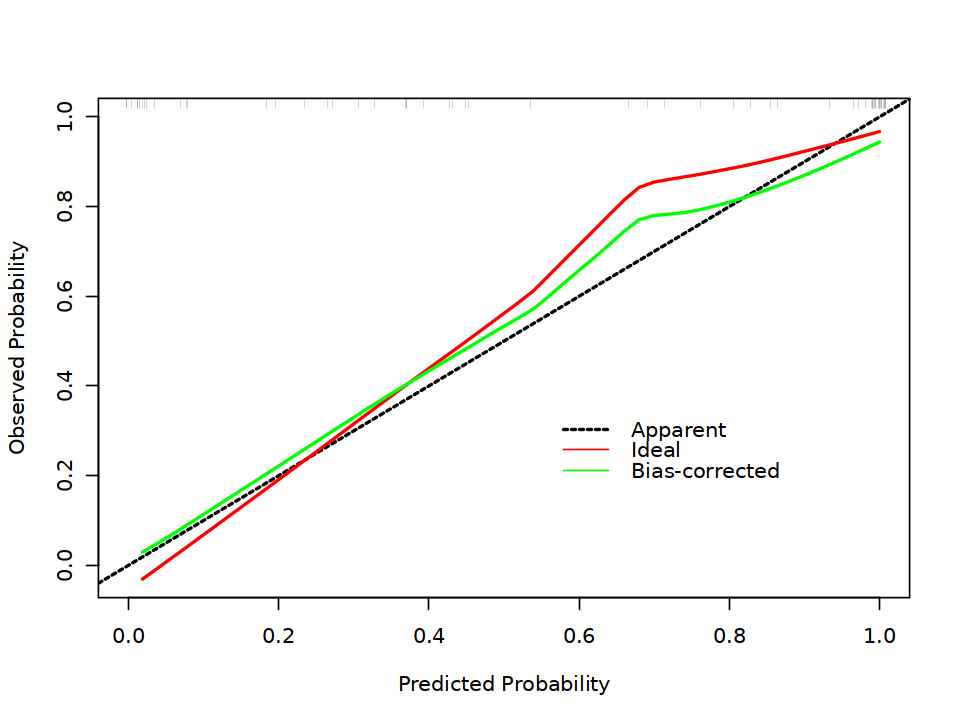

In [79]:
plot(cal1,
     xlim = c(0,1),
     xlab = "Predicted Probability",
     ylab = "Observed Probability",
     legend = FALSE,
     subtitles = FALSE)
abline(0,1,col = "black",lty = 2,lwd = 2)
lines(cal1[,c("predy","calibrated.orig")], type = "l",lwd = 2,col="red",pch =16)
lines(cal1[,c("predy","calibrated.corrected")], type = "l",lwd = 2,col="green",pch =16)
legend(0.55,0.35,
       c("Apparent","Ideal","Bias-corrected"),
       lty = c(2,1,1),
       lwd = c(2,1,1),
       col = c("black","red","green"),
       bty = "n") # "o"为加边框

In [80]:
pdf('aaa.pdf',height = 6,width = 6)
plot(cal1,
     xlim = c(0,1),
     xlab = "Predicted Probability",
     ylab = "Observed Probability",
     legend = FALSE,
     subtitles = FALSE)
abline(0,1,col = "black",lty = 2,lwd = 2)
lines(cal1[,c("predy","calibrated.orig")], type = "l",lwd = 2,col="red",pch =16)
lines(cal1[,c("predy","calibrated.corrected")], type = "l",lwd = 2,col="green",pch =16)
legend(0.55,0.35,
       c("Apparent","Ideal","Bias-corrected"),
       lty = c(2,1,1),
       lwd = c(2,1,1),
       col = c("black","red","green"),
       bty = "n") # "o"为加边框
dev.off()


n=59   Mean absolute error=0.037   Mean squared error=0.00177
0.9 Quantile of absolute error=0.056



png 
  2

In [ ]:
fold_pre <- glm(Group~.,data=train,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

In [83]:
options(repr.plot.height = 6,repr.plot.width = 6)

In [84]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following object is masked from 'package:epiDisplay':

    ci


The following objects are masked from 'package:stats':

    cov, smooth, var




In [85]:
res <- roc(data$Group,data$BCL2A1,ci=T,auc=T)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [86]:
pdf('ROC.pdf',height = 6,width = 6)
rocobj1 <- plot.roc(data$Group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$IGJ,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj4 <- lines.roc(data$Group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0("BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
                               paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
                               paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70","#491A9F"), lwd=1)
dev.off()

png 
  2

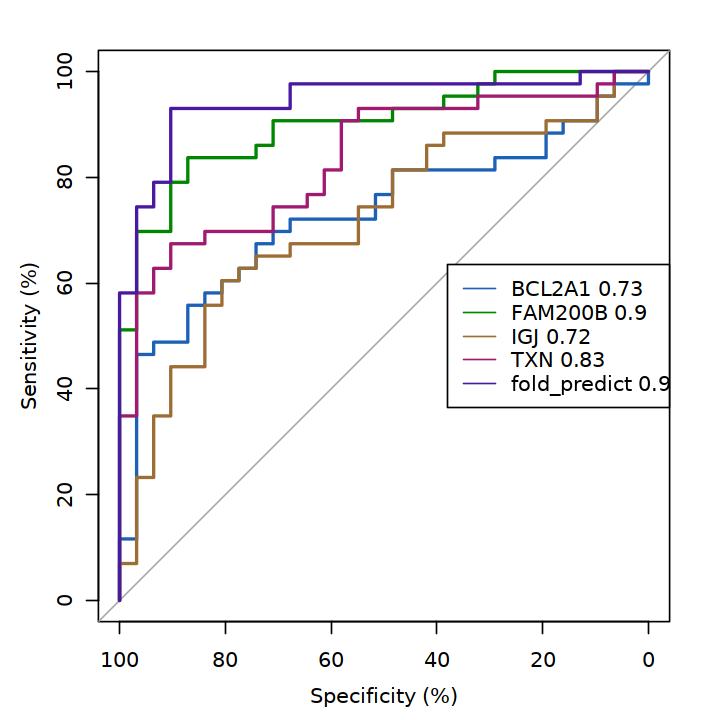

In [87]:
rocobj1 <- plot.roc(data$Group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$IGJ,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj4 <- lines.roc(data$Group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0("BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
                               paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
                               paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70","#491A9F"), lwd=1)
# testobj <- roc.test(rocobj1, rocobj2)
# text(50, 50, labels=paste("p-value =", format.pval(testobj$p.value)), adj=c(0, .5))

In [88]:
# roc_curve <- pROC::roc(Group,fold_predict)
# plot(roc_curve, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
#      grid.col=c("green", "red"), max.auc.polygon=TRUE,#legacy.axes= TRUE,
#      auc.polygon.col="skyblue", print.thres=TRUE,main="ROC curve for the set with the largest AUC value")

In [89]:
library("autoReg")
overall.log =  glm(Group~.,data=data,family=binomial())
model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)
model3


Attaching package: 'autoReg'


The following object is masked from 'package:MASS':

    select




name,desc,0 (N=31),1 (N=43),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
FAM200B,Mean <U+00B1> SD,5.0 <U+00B1> 0.9,7.2 <U+00B1> 1.7,FAM200B,"5.10 (2.36-11.01, p<.001)","5.01 (1.94-12.97, p<.001)"
BCL2A1,Mean <U+00B1> SD,29.7 <U+00B1> 13.3,50.5 <U+00B1> 34.8,BCL2A1,"1.05 (1.02-1.09, p=.002)","0.95 (0.89-1.02, p=.133)"
IGJ,Mean <U+00B1> SD,34.0 <U+00B1> 25.1,63.3 <U+00B1> 47.5,IGJ,"1.03 (1.01-1.04, p=.006)","1.03 (1.00-1.06, p=.047)"
TXN,Mean <U+00B1> SD,14.2 <U+00B1> 3.6,22.1 <U+00B1> 9.0,TXN,"1.32 (1.14-1.52, p<.001)","1.38 (1.05-1.82, p=.021)"


In [90]:
options(repr.plot.width = 8)

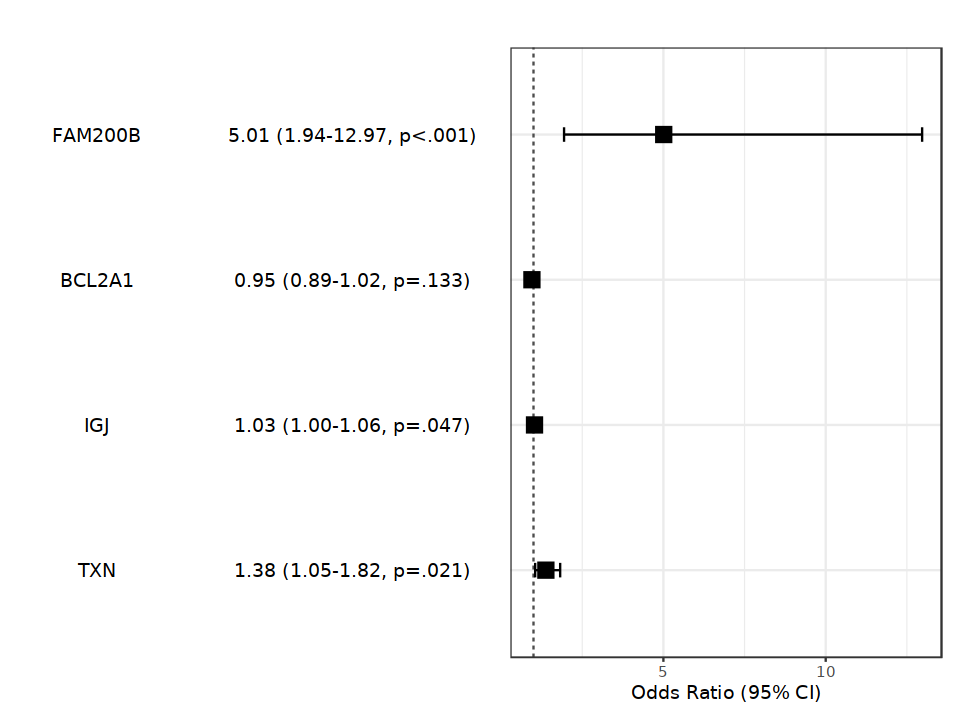

In [91]:
modelPlot(overall.log,change.pointsize = T)

In [92]:
pdf('multi.pdf',height = 6,width = 5)
modelPlot(overall.log,change.pointsize = T)
dev.off()

png 
  2

In [93]:
library(ROCR)
dd<-datadist(data)  #开始打包数据
options(datadist="dd")
data$Group = as.factor(data$Group)
fit1 <- lrm(Group~. , data=data,x=T,y=T)
save(fit1,data,file = 'train.fit1.rda')

Warning message:
"package 'ROCR' was built under R version 4.2.3"


In [94]:
library(rms)   ###加载rms包#
#f = readRDS('C:/Users/Bonjour/Desktop/bulk2.fit1.rds')
load(paste0(getwd(),'/train.fit1.rda'))
summary(fit1) 

library('regplot')
regplot(fit1,
        plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
        observation = data[1,], #用哪行观测，或者T F
        center = F, # 对齐变量
        subticks = F,
        droplines = F,#是否画竖线
        title = "nomogram",
        points = T, # 截距项显示为0-100
        odds = F, # 是否显示OR值
        showP = T, # 是否显示变量的显著性标记
        rank = "sd", # 根据sd给变量排序
        interval="confidence", # 展示可信区间
        clickable = F # 是否可以交互
)
ggsave('forest.pdf',height = 8,width = 8)

In [95]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

Loading required package: cowplot

Warning message:
"package 'cowplot' was built under R version 4.2.3"
Loading required package: tidyverse

Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
v readr     2.1.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x epiDisplay::alpha()     masks ggplot2::alpha()
x plyr::arrange()         m

In [96]:
head(data,2)

,Group,FAM200B,BCL2A1,IGJ,TXN
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,4.886505,22.32717,21.40125,7.655688
2,0,6.201921,32.12134,21.30293,17.794071


In [97]:
data1 = data

In [98]:
data1$Group = ifelse(data1$Group == 1,'CI','Con')

In [99]:
mydata<-data1 %>% 
  ## 基因表达数据gather,gather的范围应调整
  gather(key="gene",value="Expression",FAM200B:TXN) %>% 
  ##
  dplyr::select(Group,gene,Expression) 

In [100]:
compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene")
# Box plot facetted by "gene"
p <- ggboxplot(mydata, x = "Group", y = "Expression",
          color = "Group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
# Use only p.format as label. Remove method name.
#p + stat_compare_means(label =  "p.signif", label.x = 1.5)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "Group", palette = "nejm",
          add = "jitter")

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
FAM200B,Expression,Con,CI,2.706578e-10,1.1e-09,2.7e-10,****,T-test
BCL2A1,Expression,Con,CI,7.364233e-04,1.5e-03,0.00074,***,T-test
IGJ,Expression,Con,CI,1.003534e-03,1.5e-03,0.00100,**,T-test
TXN,Expression,Con,CI,2.832693e-06,8.5e-06,2.8e-06,****,T-test


In [101]:
diffgene = as.data.frame(compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
options(repr.plot.height = 5,repr.plot.width = 21)
options(repr.plot.width = 7,repr.plot.height = 5)

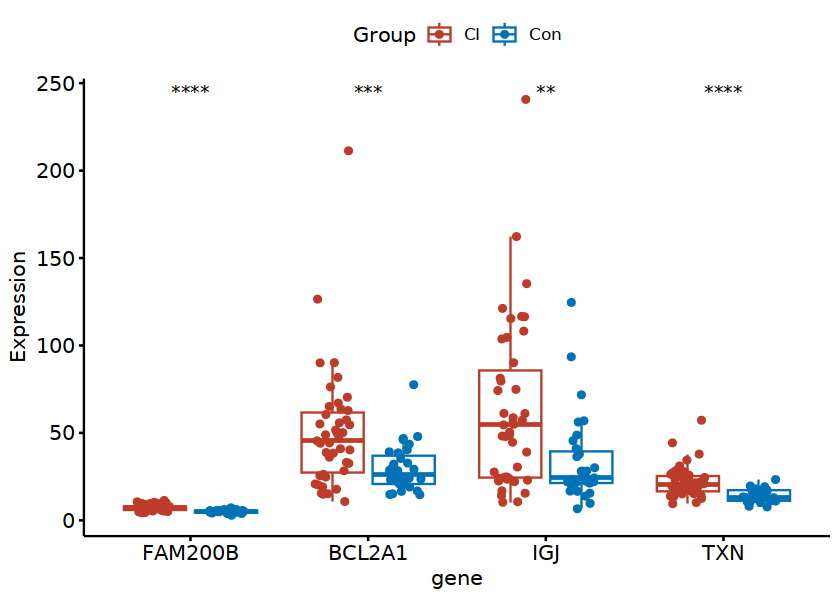

In [102]:
p + stat_compare_means(aes(group = Group), label = "p.signif",method = 't.test')

In [103]:
ggsave(file = 'figure2.gene.expr.pdf',width = 7,height = 4)

In [104]:
tend1 = data1[,c( 2:5)] 
gene_cor <- cor(tend1, method = 'pearson')
diag(gene_cor) <- 0
gene_cor <- reshape2::melt(gene_cor)
gene_cor <- subset(gene_cor, value != 0)  #去除0值的相关性
head(gene_cor)

library(circlize)
pdf('cor.circle.pdf',height = 6,width = 6)
p= chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
    grid.col = c(TNFSF14 = 'green3', CCNA2 = 'red', MARCKS = 'orange', SGOL1 = 'purple', SAP130 = 'skyblue'), #定义基因颜色
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
    annotationTrackHeight = c(0.05, 0.05), #名称离圆弧的距离，以及圆弧的宽度
)
dev.off()

,Var1,Var2,value
,<fct>,<fct>,<dbl>
2,BCL2A1,FAM200B,0.5929517
3,IGJ,FAM200B,0.2989180
4,TXN,FAM200B,0.6977731
5,FAM200B,BCL2A1,0.5929517
7,IGJ,BCL2A1,0.2126603
8,TXN,BCL2A1,0.8300201


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




png 
  2

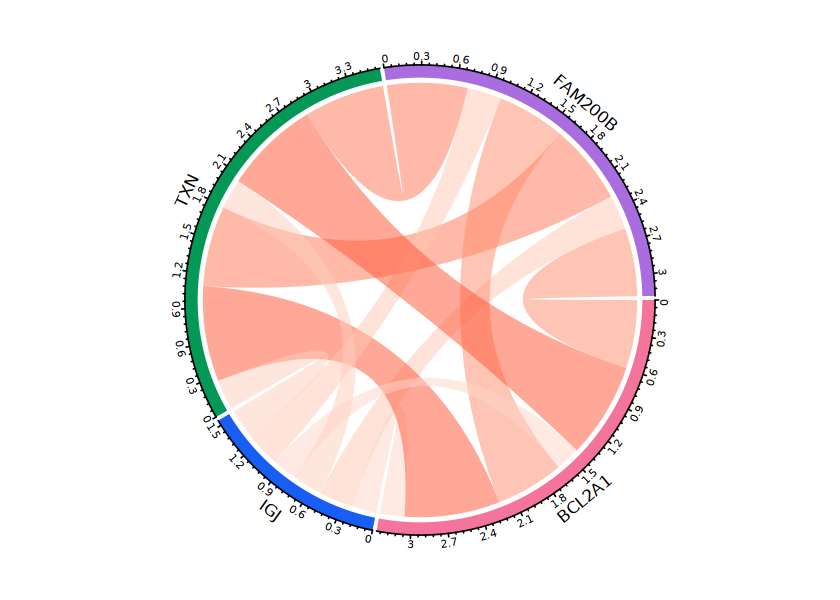

In [105]:
chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), #绘制外周圆弧区，显示名称和刻度轴
    grid.col = c(TNFSF14 = 'green3', CCNA2 = 'red', MARCKS = 'orange', SGOL1 = 'purple', SAP130 = 'skyblue'), #定义基因颜色
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), #根据相关性大小展示连线的颜色范围
    annotationTrackHeight = c(0.05, 0.05), #名称离圆弧的距离，以及圆弧的宽度
)

In [106]:
b

[1] "FAM200B" "BCL2A1"  "IGJ"     "TXN"

In [107]:
da2 = expr[,b] %>% tibble::rownames_to_column(.,'sample')

In [134]:
da2$sample = colnames(data)

In [135]:
save(da2,file = 'sample74.model.gene.rda')

In [109]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)

In [110]:
data = data[!duplicated(data$Gene_name),]

In [111]:
data = data %>% tibble::remove_rownames() %>%  tibble::column_to_rownames(.,'Gene_name')

In [112]:
head(data,2)

,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,7.70851,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,20.41526,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


In [113]:

library(GSVA)

Warning message:
"package 'GSVA' was built under R version 4.2.3"


In [114]:
geneSets = list(b)

In [115]:

GSVA_hall <- gsva(expr=as.matrix(data), 
                  gset.idx.list=geneSets, 
                  mx.diff=T, # 数据为正态分布则T，双峰则F
                  kcdf="Gaussian", #CPM, RPKM, TPM数据就用默认值"Gaussian"， read count数据则为"Poisson"，
                  parallel.sz=4) # 并行线程数目

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message in .filterFeatures(expr, method):
"2000 genes with constant expression values throuhgout the samples."
Warning message in .filterFeatures(expr, method):
"Since argument method!="ssgsea", genes with constant expression values are discarded."


Setting parallel calculations through a MulticoreParam back-end
with workers=4 and tasks=100.
Estimating GSVA scores for 1 gene sets.
Estimating ECDFs with Gaussian kernels
Estimating ECDFs in parallel on 4 cores


iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100




  |======================================================================| 100%



In [116]:
getwd()

[1] "/import/liujing/data2"

In [117]:
a = GSVA_hall %>% t() %>% as.data.frame()  %>%  tibble::rownames_to_column(.,'sample')
colnames(a) = c('sample','Hscore')

In [118]:
save(a,file = 'GSVA_hall.RDA')

### riskscoer

In [119]:
riskscore = as.data.frame(fold_predict)

In [129]:
rownames(riskscore) = colnames(data)

In [130]:
save(riskscore,file = 'riskscore.s.rda')

In [ ]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)


data = data[!duplicated(data$Gene_name),]
head(data,2)
expr = data %>%  tibble::remove_rownames()  %>%  
tibble::column_to_rownames(.,'Gene_name') %>% t() %>% as.data.frame()
Group = c(rep('con',31),rep('CI',43))



colnames(expr) = gsub('-','.',colnames(expr))

colnames(expr)

head(expr,2)

Type = ifelse(Group == 'CI',1,0)

nn = cbind(Type,expr)


In [ ]:
save(nn,file = 'data.new.rda')

In [ ]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)

In [ ]:
library(dplyr)

overlap = read.table('./overlap.txt',header =T)

data = data[!duplicated(data$Gene_name),]
head(data,2)
expr = data %>%  tibble::remove_rownames() %>% filter(Gene_name %in% overlap$GeneName) %>%  
tibble::column_to_rownames(.,'Gene_name') %>% t() %>% as.data.frame()

In [ ]:
expr$riskscore = 1.612* expr$FAM200B + (-0.05* expr$BCL2A1) +
0.029* expr$IGJ + 0.325* expr$TXN

In [ ]:
risks = expr$riskscore

In [ ]:
save(risks,file = 'diy.rda')

In [ ]:
expr